<a href="https://colab.research.google.com/github/aschelin/Dengue/blob/master/arruma_dados_sinan_faixaetaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



# Carregando os Dados do Github

Carregando o primeiro arquivo de dados de dengue por faixa etária, ano 2014.


In [2]:
url = 'https://raw.githubusercontent.com/aschelin/Dengue/master/sinan_gdf_faixaetaria_2014.csv'

In [3]:
df = pd.read_csv(url,encoding='latin',sep=';')

Carregando os demais anos de dengue por faixa etária:

In [4]:
for yearn in range(2015,2020,1):
  urlnew = 'https://raw.githubusercontent.com/aschelin/Dengue/master/sinan_gdf_faixaetaria_' + str(yearn)+'.csv'
  dfnew = pd.read_csv(urlnew,encoding='latin',sep=';')
  frames = [df,dfnew]
  df = pd.concat(frames)

Criando a coluna de tempo:


In [5]:
weeks=pd.date_range(start='1/7/2014', end='30/12/2019', freq='7D')

In [7]:
weeks

DatetimeIndex(['2014-01-07', '2014-01-14', '2014-01-21', '2014-01-28',
               '2014-02-04', '2014-02-11', '2014-02-18', '2014-02-25',
               '2014-03-04', '2014-03-11',
               ...
               '2019-10-22', '2019-10-29', '2019-11-05', '2019-11-12',
               '2019-11-19', '2019-11-26', '2019-12-03', '2019-12-10',
               '2019-12-17', '2019-12-24'],
              dtype='datetime64[ns]', length=312, freq='7D')

In [8]:
df['weeks']=weeks

In [9]:

df.head(5)

,Semana epidem. notificação,<1 Ano,1-4,5-9,10-14,15-19,20-39,40-59,60-64,65-69,70-79,80 e +,Total,Em branco/IGN,Semana epidem. 1º Sintomas(s),weeks
0,Semana 01,-,-,1,2,1,10,6,2,-,-,-,22,NaN,NaN,2014-01-07
1,Semana 02,-,4,2,13,8,50,34,2,1,3,-,117,NaN,NaN,2014-01-14
2,Semana 03,4,2,1,7,10,40,30,11,3,2,1,111,NaN,NaN,2014-01-21
3,Semana 04,3,7,12,17,17,71,49,5,5,4,1,191,NaN,NaN,2014-01-28
4,Semana 05,5,1,10,9,14,75,53,6,2,3,2,180,NaN,NaN,2014-02-04


In [10]:
df.columns

Index(['Semana epidem. notificação', '<1 Ano', '1-4', '5-9', '10-14', '15-19',
       '20-39', '40-59', '60-64', '65-69', '70-79', '80 e +', 'Total',
       'Em branco/IGN', 'Semana epidem. 1º Sintomas(s)', 'weeks'],
      dtype='object')

In [11]:
df.drop(['Semana epidem. 1º Sintomas(s)','Em branco/IGN','Semana epidem. notificação'],axis=1,inplace=True)

In [12]:
df.set_index(weeks,inplace=True)

In [13]:
df.head()

,<1 Ano,1-4,5-9,10-14,15-19,20-39,40-59,60-64,65-69,70-79,80 e +,Total,weeks
2014-01-07,-,-,1,2,1,10,6,2,-,-,-,22,2014-01-07
2014-01-14,-,4,2,13,8,50,34,2,1,3,-,117,2014-01-14
2014-01-21,4,2,1,7,10,40,30,11,3,2,1,111,2014-01-21
2014-01-28,3,7,12,17,17,71,49,5,5,4,1,191,2014-01-28
2014-02-04,5,1,10,9,14,75,53,6,2,3,2,180,2014-02-04


# Fazendo o gráfico de dengue (total) para todos os anos (2014-2019)

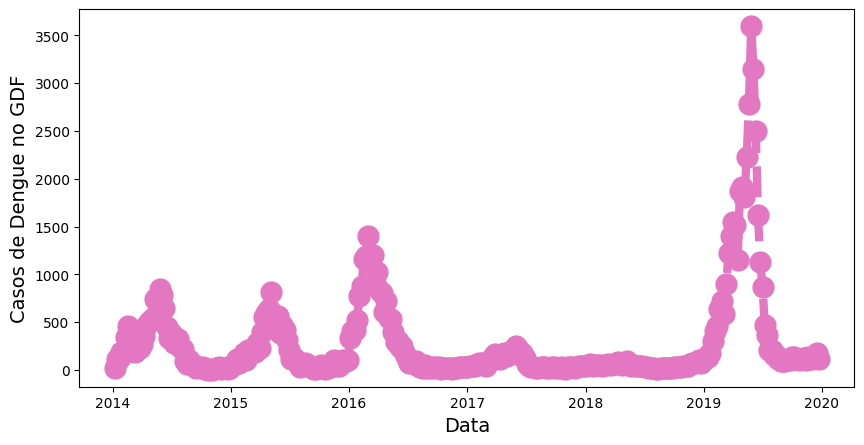

In [14]:
fig, (ax1) = plt.subplots(1,figsize=(10,5),dpi=100)

ax1.plot(df.Total,marker='o', linestyle='--',    linewidth=6,markersize=15, color='tab:pink')
maxi=round(df.Total.max()+100);
ax1.set_ylabel('Casos de Dengue no GDF',fontsize=14);
ax1.set_xlabel('Data',fontsize=14);

# Arrumando os dados para usar no flourish

In [15]:
df.replace('-',0,inplace=True)

Mudando o formato dos dados no pandas:

In [16]:
df=df.astype('int64')


In [17]:
df_t = df.T

In [18]:
df_t

,2014-01-07,2014-01-14,2014-01-21,2014-01-28,2014-02-04,2014-02-11,2014-02-18,2014-02-25,2014-03-04,2014-03-11,2014-03-18,2014-03-25,2014-04-01,2014-04-08,2014-04-15,2014-04-22,2014-04-29,2014-05-06,2014-05-13,2014-05-20,2014-05-27,2014-06-03,2014-06-10,2014-06-17,2014-06-24,2014-07-01,2014-07-08,2014-07-15,2014-07-22,2014-07-29,2014-08-05,2014-08-12,2014-08-19,2014-08-26,2014-09-02,2014-09-09,2014-09-16,2014-09-23,2014-09-30,2014-10-07,...,2019-03-26,2019-04-02,2019-04-09,2019-04-16,2019-04-23,2019-04-30,2019-05-07,2019-05-14,2019-05-21,2019-05-28,2019-06-04,2019-06-11,2019-06-18,2019-06-25,2019-07-02,2019-07-09,2019-07-16,2019-07-23,2019-07-30,2019-08-06,2019-08-13,2019-08-20,2019-08-27,2019-09-03,2019-09-10,2019-09-17,2019-09-24,2019-10-01,2019-10-08,2019-10-15,2019-10-22,2019-10-29,2019-11-05,2019-11-12,2019-11-19,2019-11-26,2019-12-03,2019-12-10,2019-12-17,2019-12-24
<1 Ano,0,0,4,3,5,6,7,1,3,4,4,6,3,8,6,8,5,7,10,13,12,6,13,11,7,14,5,10,3,4,4,2,3,2,0,2,0,0,0,0,...,19,24,16,19,32,28,29,35,35,49,48,55,37,31,18,17,9,6,5,2,4,6,0,7,1,0,1,4,6,3,1,9,4,9,5,2,7,3,7,6
1-4,0,4,2,7,1,5,10,4,5,4,7,3,1,6,10,15,9,9,7,14,16,15,13,5,14,5,7,9,8,10,3,2,3,4,1,0,0,1,3,2,...,39,40,39,22,33,48,41,43,52,84,69,79,56,40,29,16,14,8,8,4,6,8,4,5,4,6,9,9,8,9,6,12,5,8,15,5,9,8,9,4
5-9,1,2,1,12,10,17,25,12,13,3,7,8,18,16,11,24,23,34,23,28,34,37,34,18,10,15,8,13,15,9,7,3,2,3,1,3,0,0,1,2,...,56,71,50,31,82,93,84,93,132,162,146,130,89,79,48,34,18,11,10,12,6,9,6,6,11,12,11,13,17,13,16,10,14,6,16,11,8,9,4,7
10-14,2,13,7,17,9,32,37,17,19,16,13,23,18,28,26,38,46,39,47,75,76,69,58,43,28,30,20,26,26,23,16,8,3,4,4,3,1,3,2,0,...,111,103,108,78,129,122,125,161,213,285,239,186,125,100,59,40,24,15,13,9,5,6,9,1,3,8,10,20,16,13,9,8,11,8,11,7,11,4,12,10
15-19,1,8,10,17,14,36,47,16,20,16,38,28,32,33,38,58,50,54,83,69,95,92,68,56,32,37,35,30,29,26,19,9,4,9,4,9,3,3,2,5,...,143,165,152,121,200,184,191,204,261,344,291,232,135,87,75,37,43,17,24,19,17,14,4,7,14,10,15,20,16,9,9,9,14,12,10,11,10,7,20,9
20-39,10,50,40,71,75,145,199,80,92,81,101,93,100,137,201,179,212,215,308,260,348,305,234,195,148,141,124,140,129,101,81,35,27,44,29,14,13,11,6,10,...,542,618,589,427,709,731,691,883,1098,1430,1260,1018,611,444,322,190,153,89,85,66,61,40,48,39,34,32,33,48,51,44,45,47,47,42,50,48,43,64,75,37
40-59,6,34,30,49,53,79,114,51,50,53,73,54,65,92,120,142,131,138,219,168,208,195,177,95,76,110,62,63,82,56,66,21,17,27,14,15,7,9,5,6,...,387,405,444,351,512,555,475,603,759,948,821,615,421,257,243,110,91,53,48,27,41,26,13,30,22,20,13,17,19,17,16,11,29,16,25,30,18,29,33,37
60-64,2,2,11,5,6,9,8,8,8,6,6,8,13,14,21,12,23,22,16,20,19,31,18,16,3,12,15,9,11,9,7,5,2,6,1,1,1,1,2,1,...,41,47,54,48,77,61,59,75,90,121,115,88,64,32,33,11,8,4,6,4,4,3,4,1,4,8,2,1,1,3,2,2,1,1,5,3,0,4,10,5
65-69,0,1,3,5,2,10,7,6,6,3,5,5,11,7,14,11,11,12,14,6,19,13,10,7,11,3,2,23,9,1,4,2,0,2,0,1,0,0,0,0,...,25,41,34,27,35,46,50,54,62,69,73,47,39,20,18,7,6,1,5,4,4,2,1,0,1,0,2,1,2,1,0,1,0,0,0,0,1,2,4,2
70-79,0,3,2,4,3,2,6,3,3,2,7,2,5,8,12,16,14,14,12,19,16,18,20,8,7,17,4,8,6,5,8,6,0,3,0,1,1,0,0,1,...,27,23,27,19,40,35,49,57,59,75,66,36,29,29,13,10,3,1,5,4,3,1,2,1,2,4,2,0,2,1,0,5,2,3,2,1,3,2,5,2


Exportando os dados para usar no flourish

In [ ]:
df_t.to_csv ('testeFE.csv',  header=True)

# Separando os dados por ano e mês

In [19]:
df['year'] = df.index.year
df['month'] = df.index.month


In [20]:
df.head(5)

,<1 Ano,1-4,5-9,10-14,15-19,20-39,40-59,60-64,65-69,70-79,80 e +,Total,weeks,year,month
2014-01-07,0,0,1,2,1,10,6,2,0,0,0,22,1389052800000000000,2014,1
2014-01-14,0,4,2,13,8,50,34,2,1,3,0,117,1389657600000000000,2014,1
2014-01-21,4,2,1,7,10,40,30,11,3,2,1,111,1390262400000000000,2014,1
2014-01-28,3,7,12,17,17,71,49,5,5,4,1,191,1390867200000000000,2014,1
2014-02-04,5,1,10,9,14,75,53,6,2,3,2,180,1391472000000000000,2014,2


Casos de dengue por ano:

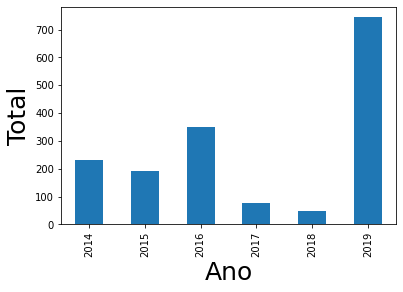

In [21]:
ax1 = df.groupby('year').Total.mean().plot.bar();
ax1.set_ylabel('Total',fontsize=25);
ax1.set_xlabel('Ano',fontsize=25);

Casos de dengue por mês entre os anos de 2014 a 2019:

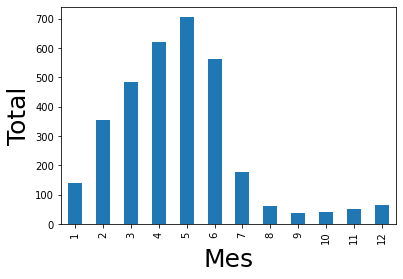

In [22]:
ax1 = df.groupby('month').Total.mean().plot.bar();
ax1.set_ylabel('Total',fontsize=25);
ax1.set_xlabel('Mes',fontsize=25);

# Outras coisas:

In [ ]:

dfroll = df.rolling(4).mean()

In [ ]:
dfroll.head()

,<1 Ano,1-4,5-9,10-14,15-19,20-39,40-59,60-64,65-69,70-79,80 e +,Total,weeks,year,month
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-28,1.75,3.25,4.00,9.75,9.00,42.75,29.75,5.0,2.25,2.25,0.5,110.25,1.389960e+18,2014.0,1.00
2014-02-04,3.00,3.50,6.25,11.50,12.25,59.00,41.50,6.0,2.75,3.00,1.0,149.75,1.390565e+18,2014.0,1.25


In [ ]:
dfroll_t = dfroll.T
df_t.to_csv ('testeFE.csv',  header=True)

In [ ]:
dfcumsul = df.cumsum()

In [ ]:
dfcumsul.head()

,<1 Ano,1-4,5-9,10-14,15-19,20-39,40-59,60-64,65-69,70-79,80 e +,Total,weeks,year,month
2014-01-07,0,0,1,2,1,10,6,2,0,0,0,22,1389052800000000000,2014,1
2014-01-14,0,4,3,15,9,60,40,4,1,3,0,139,2778710400000000000,4028,2
2014-01-21,4,6,4,22,19,100,70,15,4,5,1,250,4168972800000000000,6042,3
2014-01-28,7,13,16,39,36,171,119,20,9,9,2,441,5559840000000000000,8056,4
2014-02-04,12,14,26,48,50,246,172,26,11,12,4,621,6951312000000000000,10070,6


In [ ]:
dfcumsum_t = dfcumsul.T
dfcumsum_t.to_csv ('testeFE.csv',  header=True)